In [2]:
#### COLAB ONLY CELL
# from google.colab import drive
# drive.mount('/content/gdrive')
%cd /content/gdrive/MyDrive/COMEXT
!pip install -r ./comext-graph-analysis/requirements.txt

/content/gdrive/.shortcut-targets-by-id/12Z8uhW8Lh6UN1HxCes7BCKalQ1rxgm9z/COMEXT
  Using cached eurostat-0.2.3-py3-none-any.whl (11 kB)
     |████████████████████████████████| 45 kB 1.7 MB/s 
     |████████████████████████████████| 49 kB 4.6 MB/s 
  Created wheel for jsonpath-rw: filename=jsonpath_rw-1.4.0-py3-none-any.whl size=15147 sha256=61436af4b7023f4d9e0275db36fd0fc2d4ec5e2775be4e7f6cc060f57ec93e19
  Stored in directory: /root/.cache/pip/wheels/58/88/2a/8d619cf38d7cf939e54b6ccdece05d31b64b3eb419c11d1ed3
Successfully built jsonpath-rw


In [3]:
import eurostat, random, math, os
import pandas as pd
import numpy as np
import networkx as nx
from networkx.readwrite import json_graph
import matplotlib.pyplot as plt

In [4]:
toc_df = eurostat.get_avail_sdmx_df()

In [5]:
toc_df

,name
dataflow,
DS-018995,EU trade since 1988 by SITC
DS-022469,Extra-EU trade since 2000 by mode of transport...
DS-032655,EU trade since 1988 by BEC/rev.4
DS-043227,EFTA trade since 1995 by SITC
DS-066341,"Sold production, exports and imports by PRODCO..."
...,...
yth_incl_120,Young people living in households with very lo...
yth_part_010,Frequency of getting together with relatives o...
yth_part_020,Frequency of contacts with relatives or friend...


In [6]:
eurostat.subset_avail_sdmx_df(toc_df,'eu trade')

,name
dataflow,
DS-018995,EU trade since 1988 by SITC
DS-022469,Extra-EU trade since 2000 by mode of transport...
DS-032655,EU trade since 1988 by BEC/rev.4
DS-1060915,EU trade since 1988 by CPA 2008
DS-1062396,EU trade since 1988 by CPA 2.1
DS-1180622,EU trade since 2015 of COVID-19 medical supplies
DS-1262527,Extra-EU trade since 2000 by mode of transport...
DS-1267031,EU trade with UK (NI) and UK (excl. NI) since ...
DS-1288854,EU trade since 2017 by BEC/rev.5


In [23]:
START=2001
END=2002

eurostat.get_sdmx_data(code="sprt_trd_prt",StartPeriod=str(START),EndPeriod=str(END),
                          filter_pars={
                                        # 'INDICATORS':["VALUE_IN_EUROS"],
                                        # "PRODUCT":['TOTAL'],
                                       "PARTNER":["AE"]
                                        })

AttributeError: ignored

In [9]:
db_codes = {
    "extra_transport_nstr":"DS-022469",
    "eu_trade_bec":"DS-032655",
    "eu_trade_sitc":"DS-018995",
    "eu_trade_cpa21":"DS-1062396"
}

In [19]:
eurostat.get_sdmx_dims("sprt_trd_prt")

['FREQ',
 'GEO',
 'INDICATORS',
 'OBS_FLAG',
 'PARTNER',
 'PROD_SP',
 'STK_FLOW',
 'TIME',
 'UNIT']

In [22]:
eurostat.get_sdmx_dic("sprt_trd_prt","PARTNER")

{'AE': 'United Arab Emirates',
 'AT': 'Austria',
 'AU': 'Australia',
 'BD': 'Bangladesh',
 'BE': 'Belgium',
 'BG': 'Bulgaria',
 'BM': 'Bermuda (UK)',
 'CA': 'Canada',
 'CH': 'Switzerland',
 'CN_X_HK': 'China except Hong Kong',
 'CY': 'Cyprus',
 'CZ': 'Czechia',
 'DE': 'Germany (until 1990 former territory of the FRG)',
 'DK': 'Denmark',
 'EE': 'Estonia',
 'EL': 'Greece',
 'ES': 'Spain',
 'EXT_EU27_2020': 'Extra-EU27 (from 2020)',
 'EXT_EU28': 'Extra-EU28 (2013-2020)',
 'FI': 'Finland',
 'FR': 'France',
 'GI': 'Gibraltar (UK)',
 'HK': 'Hong Kong',
 'HR': 'Croatia',
 'HU': 'Hungary',
 'ID': 'Indonesia',
 'IE': 'Ireland',
 'INT_EU27_2020': 'Intra-EU27 (from 2020)',
 'INT_EU28': 'Intra-EU28 (2013-2020)',
 'IT': 'Italy',
 'JP': 'Japan',
 'KH': 'Cambodia',
 'KR': 'South Korea',
 'KY': 'Cayman Islands (UK)',
 'LK': 'Sri Lanka',
 'LT': 'Lithuania',
 'LU': 'Luxembourg',
 'LV': 'Latvia',
 'MH': 'Marshall Islands',
 'MT': 'Malta',
 'NL': 'Netherlands',
 'NO': 'Norway',
 'OTH': 'Others',
 'PK': 'P

In [10]:
eurostat.get_sdmx_dims(db_codes["eu_trade_cpa21"])

['FLOW', 'FREQ', 'INDICATORS', 'PARTNER', 'PRODUCT', 'REPORTER']

In [11]:
eurostat.get_sdmx_dic(db_codes["eu_trade_cpa21"],"PRODUCT")

{'01': 'Products of agriculture, hunting and related services',
 '011': 'Non-perennial crops',
 '0111': 'Cereals (except rice), leguminous crops and oil seeds',
 '0112': 'Rice, not husked',
 '0113': 'Vegetables and melons, roots and tubers',
 '0114': 'Sugar cane',
 '0115': 'Unmanufactured tobacco',
 '0116': 'Fibre crops',
 '0119': 'Other non-perennial crops',
 '012': 'Perennial crops',
 '0121': 'Grapes',
 '0122': 'Tropical and subtropical fruits',
 '0123': 'Citrus fruits',
 '0124': 'Pome fruits and stone fruits',
 '0125': 'Other tree and bush fruits and nuts',
 '0126': 'Oleaginous fruits',
 '0127': 'Beverage crops',
 '0128': 'Spices, aromatic, drug and pharmaceutical crops',
 '0129': 'Other perennial crops',
 '013': 'Planting material: live plants, bulbs, tubers and roots, cuttings and slips; mushroom spawn',
 '0130': 'Planting material: live plants, bulbs, tubers and roots, cuttings and slips; mushroom spawn',
 '014': 'Live animals and animal products',
 '0141': 'Dairy cattle, live an

In [ ]:
reporters_eu = list(eurostat.get_sdmx_dic(db_codes["eu_trade_cpa21"],"REPORTER").keys())
reporters_eu.remove('EU')
# reporters_eu.remove('EU27_2020')
# reporters_eu.remove('EU28')
# reporters_eu.remove('EUROZONE')
# reporters_eu

In [14]:
START = 202101 # >= 2000
END = 202102

In [18]:
eurostat.get_sdmx_data_df(code=db_codes["eu_trade_bec"],StartPeriod=str(START),EndPeriod=str(END),
                          filter_pars={
                        #                 # 'FLOW':['1','2'],
                                        'INDICATORS':["VALUE_IN_EUROS"],
                                        "PRODUCT":['TOTAL'],
                                        # "PARTNER":reporters_eu,
                                        # 'FREQ':["A"],
                        #                 # "REPORTER":reporters_eu
                                        # "TRANSPORT_MODE":["1"]
                                        },
                          flags=False, verbose=True)

HTTPError 404: DS-032655 not found in the Eurostat server


HTTPError: ignored

In [ ]:
if not os.path.exists("./data-samples/sdmx/intra_cpa_21_22.csv"):
    df = eurostat.get_sdmx_data_df(db_codes["eu_trade_cpa"],StartPeriod=str(START),EndPeriod=str(END),
                          filter_pars={
                        #                 # 'FLOW':['1','2'],
                                        'INDICATORS':["VALUE_IN_EUROS"],
                                        # "PRODUCT":["0","1","2","3","4","5","6","7","8","9","TOT"],
                                        # "PARTNER":reporters_eu,
                                        # 'FREQ':["A"],
                        #                 # "REPORTER":reporters_eu
                                        # "TRANSPORT_MODE":["1"]
                                        },
                          flags=False, verbose=True).astype(dict(
                              [(y,float) for y in range(START,END+1)]
                          ))
else:
    df = pd.read_csv("./data-samples/sdmx/extra_nstr_transport1_00_22.csv")


AttributeError: ignored

In [ ]:
df = df.astype(dict([(str(y),float) for y in range(START,END+1)]))

In [ ]:
df = df.drop(index=df[df.REPORTER == df.PARTNER].index)

In [ ]:
df.to_csv("./data-samples/sdmx/extra_nstr_transport1_00_22.csv")

In [ ]:
for t in range(0,10):
    eurostat.get_sdmx_data_df(db_codes["extra_transport_nstr"],StartPeriod=str(START),EndPeriod=str(END),
                          filter_pars={
                        #                 # 'FLOW':['1','2'],
                                        'INDICATORS':["VALUE_IN_EUROS"],
                                        "PRODUCT": ["0","1","2","3","4","5","6","7","8","9","TOT"],
                                        "PARTNER": reporters_eu,
                                        'FREQ':["A"],
                        #                 # "REPORTER":reporters_eu
                                        "TRANSPORT_MODE":[str(t)]
                                        },
                          flags=False, verbose=True).astype(dict(
                              [(y,float) for y in range(START,END+1)]
                          )).to_csv(f"../data-samples/sdmx/extra_nstr_transport{t}_00_22.csv")

In [ ]:
def makeGraph_sdmx(tab4graph, product, pos_ini=None, weight_flag=False, flow=1, criterio=None): 
    """makeGraph(tab4graph, pos_ini=None, weight_flag=False, flow=1, criterio=None)

    Args:
        tab4graph (_type_): _description_
        pos_ini (_type_, optional): _description_. Defaults to None.
        weight_flag (bool, optional): _description_. Defaults to False.
        flow (int, optional): _description_. Defaults to 1.
        criterio (str, optional): _description_. Defaults to "VALUE_IN_EUROS".

    Returns:
        coord, new_dict, G
    """
    # costruisce sulla base della tabella filtrata
    # il grafo con le relative metriche
    # logging.info("### makeGraph... ")     

    if criterio == None:
        criterio = tab4graph.columns[-1]

    tab4graph = tab4graph[tab4graph.PRODUCT == product]

    def calc_metrics(Grafo,weight_flag):
        # logging.info("### metrics... ")     
        in_deg = nx.in_degree_centrality(Grafo)
        metrics = {}
        vulner = {}
        for k, v in in_deg.items():
            if v!=0:      
                vulner[k] = 1-v
            else:
                vulner[k] = 0            
            metrics={
                "degree_centrality": nx.degree_centrality(Grafo),
                "density": nx.density(Grafo),
                "vulnerability": vulner,
                "exportation strength": nx.out_degree_centrality(Grafo),
                "eigenvector_centrality": nx.eigenvector_centrality(Grafo),
                "closeness_centrality":nx.closeness_centrality(Grafo),
                "clustering":nx.clustering(Grafo),
                "betweenness_centrality":nx.betweenness_centrality(Grafo),
                "hubness": nx.closeness_centrality(Grafo.to_undirected())
            }
        return metrics

    G = nx.DiGraph()

    # assegno i ruoli IMPORT e EXPORT
    if flow == 1:
        # logging.info("FLOW: import")
        country_from = "PARTNER"
        country_to = "REPORTER"
        
    if flow == 2:
        # logging.info("FLOW: export")    
        country_from = "REPORTER"
        country_to = "PARTNER"

    # costruisco il grafo con edges e nodi
    # se il grafo è pesato
    # assegno il peso VALUE o QUANTITY in funzione del criterio scelto per ordinare il mercato
    # ed eseguire il taglio      
    if weight_flag == True:
        Wsum = tab4graph[criterio].sum()
        edges = [(i,j,w/Wsum) for i,j,w in tab4graph.loc[:,[country_from,country_to,criterio]].values]
    if weight_flag == False:
        edges = [(i,j,1) for i,j in tab4graph.loc[:,[country_from,country_to]].values]

    G.add_weighted_edges_from(edges)

    # Calcolo le metriche
    MetricG = calc_metrics(G, weight_flag)	
    
    # passo alla rappresentazione json del grafo
    GG = json_graph.node_link_data(G)
    Nodes = GG["nodes"]
    Links = GG["links"]

    if pos_ini is None:
        pos_ini = {}
        random.seed(8)
        for node in Nodes:
            x = random.uniform(0, 1)
            y = random.uniform(0, 1)
            pos_ini[node['id']] = np.array([x,y])
    # else:
    #         logging.info("-- POSIZIONE DEI NODI PRECEDENTE ACQUISITA --")
    try:
        # logging.info(str(pos_ini))
        coord = nx.spring_layout(G,k=5/math.sqrt(G.order()),pos=pos_ini)
        coord = nx.spring_layout(G,k=5/math.sqrt(G.order()),pos=coord) # stable solution
        # coord = nx.spring_layout(G,k=5/math.sqrt(G.order()),pos=coord) # stable solution
    except:
        return None,None,None

    #########################################################
    df_coord = pd.DataFrame.from_dict(coord,orient='index')
    df_coord.columns = ['x', 'y']

    df = pd.DataFrame(GG["nodes"])
    df.columns = ['label']
    df['id'] = np.arange(df.shape[0])
    df = df[['id', 'label']]    
    out = pd.merge(df, df_coord, left_on='label', right_index=True)
    dict_nodes = out.T.to_dict().values()
    
    dfe = pd.DataFrame(GG["links"])[["source" , "target"]]
    res = dfe.set_index('source').join(out[['label','id']].set_index('label'), on='source', how='left')
    res.columns = ['target', 'source_id']
    res2 = res.set_index('target').join(out[['label','id']].set_index('label'), on='target', how='left')
    res2.columns = ['from','to']
    res2.reset_index(drop=True, inplace=True)
    dict_edges = res2.T.to_dict().values()

    new_dict = { "nodes": list(dict_nodes), "edges": list(dict_edges), "metriche": MetricG}

    # JSON = json.dumps(new_dict) 
    # logging.info("### makeGraph exit")   

    return coord, new_dict, G

In [ ]:
coord, new_dict, G = makeGraph_sdmx(df,product="0",criterio='2001',weight_flag=True)

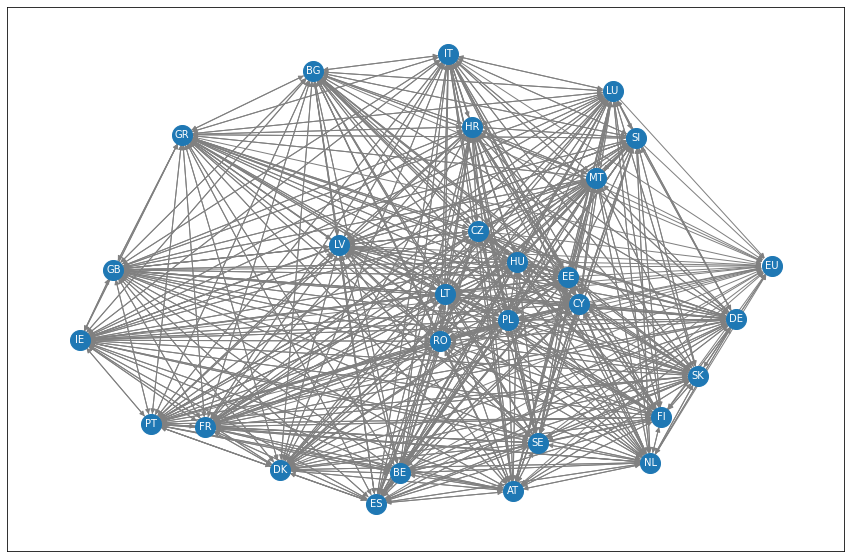

In [ ]:
plt.figure(figsize=(15,10))
nx.draw_networkx(G,node_size=400,font_color="white",font_size=10,edge_color="gray")

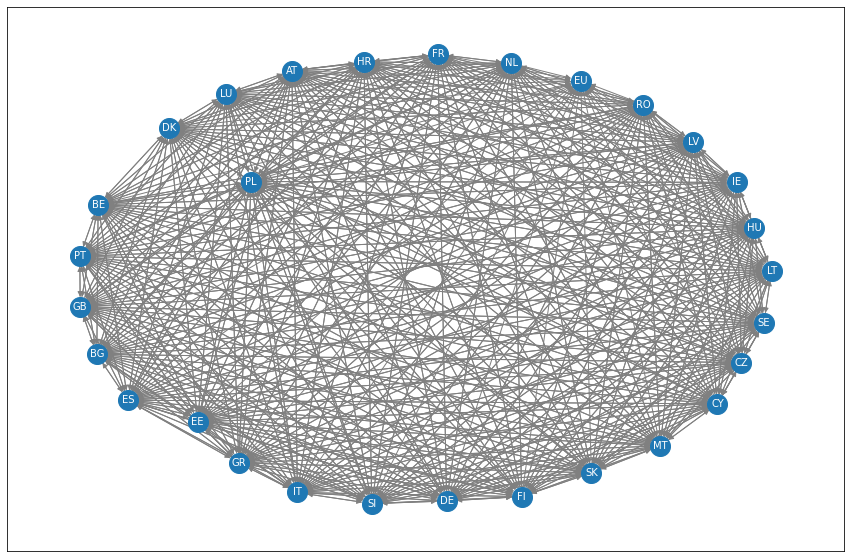

In [ ]:
plt.figure(figsize=(15,10))
nx.draw_networkx(G,pos=coord,node_size=400,font_color="white",font_size=10,edge_color="gray")

In [ ]:
!pip install eurostatapiclient

In [ ]:
from eurostatapiclient import EurostatAPIClient

In [ ]:
# Choose service version : only v2.1 is currently available
VERSION = 'v2.1'

# Only json is currently available
FORMAT = 'json'

# Specify language : en, fr, de
LANGUAGE = 'en'

client = EurostatAPIClient(VERSION, FORMAT, LANGUAGE)

In [ ]:
client.get_dataset("ext_go_detailds-1062396",params={"FREQ":["A"],"PERIOD":["2020"],"REPORTER":["IT"],"PRODUCT":["TOTAL"]})

HTTPError: ignored